# Purpose

Students have the option of using Pandas and SQL to complete this project. A Phase 1 project done completely in pandas, completely in SQL, or a mixture of the two can all be considered a fine Phase 1 project. This notebook serves as a resource for setting up an SQL database for students who wish to use SQL in their Phase 1 project.

**To create the `movies.db` database, run the code cells below.**
> The Entity Relational Diagram is below

In [1]:
import pandas as pd
import sqlite3 
conn = sqlite3.connect('data/movies.db')
cur = conn.cursor()
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
pd.options.display.float_format='{:.2f}'.format

In [2]:
from src.make_db import create_movies_db

In [3]:
create_movies_db()

imdb_title_principals table created successfully....
imdb_name_basic table created successfully....
imdb_title_crew table created successfully....
imdb_title_ratings table created successfully....
imdb_title_basics table created successfully....
imdb_title_akas table created successfully....
tn_movie_budgets table created successfully....
tmdb_movies table created successfully....
bom_movie_gross table created successfully....
rotten_tomatoes_critic_reviews table created successfully....
rotten_tomatoes_movies table created successfully....
Inserting data into the imdb_title_crew table....
Inserting data into the tmdb_movies table....
Inserting data into the imdb_title_akas table....
Inserting data into the imdb_title_ratings table....
Inserting data into the imdb_name_basics table....
Inserting data into the rotten_tomatoes_movies table....
Inserting data into the rotten_tomatoes_critic_reviews table....
Inserting data into the imdb_title_basics table....
Inserting data into the tn_mo

![movies.db schema](images/movies_db_schema.png)

In [4]:
# rtom = pd.read_sql('''SELECT * 
#                 FROM rotten_tomatoes_movies
#                 ;''', conn)
# rtom.info(10)
#rotten_tomatoes_movies has 17,712 obs in 23 cols

# tn_budgets = pd.read_sql('''SELECT *
#                  FROM tn_movie_budgets
#                  ;''', conn)
# tn_budgets.info()
# #tn_budgets has 5,782 obs in 7 columns

In [5]:
# imdb = pd.read_sql('''SELECT *
#                 FROM imdb_title_basics
#                 ;''', conn)
# imdb.info()
#146,144 entries in 7 cols

In [6]:
# bom = pd.read_sql('''SELECT *
#                 FROM bom_movie_gross
#                 ;''', conn)
# bom.info()
#3387 entries in 6 cols

In [7]:
# imdb_title = pd.read_sql('''SELECT *
#                 FROM imdb_title_ratings
#                 ;''', conn)
# imdb_title.info()
#73,856 entries in 4 cols

In [8]:
df = pd.read_sql('''SELECT *
                 FROM tmdb_movies
                 ;''', conn)
df.info()
#tmdb_movies has 26,517 rows in 10 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idx                26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


### sort the database first to pull out the 100 most popular then analyze genres (code from Dorothy)

#### code to pull movies from 2010-2020 & sort by popularity

In [9]:
#sort for decade from 2010-2020
df = df[(df['release_date'] >= '2010-01-00') & (df['release_date'] <= '2020-01-00')]
df.shape
#sort by popularity
date = df.sort_values(by='popularity',ascending=False).head(100)
date

,idx,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.77,2018-04-27,Avengers: Infinity War,8.30,13948
11019,11019,"[28, 53]",245891,en,John Wick,78.12,2014-10-24,John Wick,7.20,10081
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.53,2018-12-14,Spider-Man: Into the Spider-Verse,8.40,4048
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.78,2014-12-17,The Hobbit: The Battle of the Five Armies,7.30,8392
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.29,2012-05-04,The Avengers,7.60,19673
...,...,...,...,...,...,...,...,...,...,...
17389,17389,"[10749, 16, 18]",372058,ja,君の名は。,28.24,2017-04-07,Your Name.,8.60,4161
20633,20633,"[35, 18]",440472,en,The Upside,28.14,2019-01-11,The Upside,7.30,274
20634,20634,"[12, 28, 14, 35]",166426,en,Pirates of the Caribbean: Dead Men Tell No Tales,28.10,2017-05-26,Pirates of the Caribbean: Dead Men Tell No Tales,6.60,6931
14177,14177,"[28, 12, 878]",76341,en,Mad Max: Fury Road,28.10,2015-05-15,Mad Max: Fury Road,7.40,14454


### pull apart genres for tmdb datatable


In [10]:
#rename df to keep code intact
tmdb = date
tmdb.head(10)

,idx,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.77,2018-04-27,Avengers: Infinity War,8.30,13948
11019,11019,"[28, 53]",245891,en,John Wick,78.12,2014-10-24,John Wick,7.20,10081
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.53,2018-12-14,Spider-Man: Into the Spider-Verse,8.40,4048
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.78,2014-12-17,The Hobbit: The Battle of the Five Armies,7.30,8392
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.29,2012-05-04,The Avengers,7.60,19673
11021,11021,"[28, 878, 12]",118340,en,Guardians of the Galaxy,49.61,2014-08-01,Guardians of the Galaxy,7.90,17958
23813,23813,"[878, 28, 53]",335984,en,Blade Runner 2049,48.57,2017-10-06,Blade Runner 2049,7.40,6679
20617,20617,"[878, 28, 53]",335984,en,Blade Runner 2049,48.57,2017-10-06,Blade Runner 2049,7.40,6679
23814,23814,[12],338952,en,Fantastic Beasts: The Crimes of Grindelwald,48.51,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,6.90,4870
23815,23815,"[10751, 16, 35, 14, 12]",404368,en,Ralph Breaks the Internet,48.06,2018-11-21,Ralph Breaks the Internet,7.20,2626


In [11]:
#using eval to turn an expression into numerics
tmdb.genre_ids = tmdb.genre_ids.apply(eval)

In [12]:
#explode genre ids in sorted table
tmdb_exploded = tmdb.explode('genre_ids')

In [13]:
#verify that it looks right
tmdb_exploded.head(20)

,idx,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,12,299536,en,Avengers: Infinity War,80.77,2018-04-27,Avengers: Infinity War,8.30,13948
23811,23811,28,299536,en,Avengers: Infinity War,80.77,2018-04-27,Avengers: Infinity War,8.30,13948
23811,23811,14,299536,en,Avengers: Infinity War,80.77,2018-04-27,Avengers: Infinity War,8.30,13948
11019,11019,28,245891,en,John Wick,78.12,2014-10-24,John Wick,7.20,10081
11019,11019,53,245891,en,John Wick,78.12,2014-10-24,John Wick,7.20,10081
23812,23812,28,324857,en,Spider-Man: Into the Spider-Verse,60.53,2018-12-14,Spider-Man: Into the Spider-Verse,8.40,4048
23812,23812,12,324857,en,Spider-Man: Into the Spider-Verse,60.53,2018-12-14,Spider-Man: Into the Spider-Verse,8.40,4048
23812,23812,16,324857,en,Spider-Man: Into the Spider-Verse,60.53,2018-12-14,Spider-Man: Into the Spider-Verse,8.40,4048
23812,23812,878,324857,en,Spider-Man: Into the Spider-Verse,60.53,2018-12-14,Spider-Man: Into the Spider-Verse,8.40,4048
23812,23812,35,324857,en,Spider-Man: Into the Spider-Verse,60.53,2018-12-14,Spider-Man: Into the Spider-Verse,8.40,4048


In [14]:
#recode genre_ids to categories
#first, make a new column
tmdb_exploded['genre_codes'] = tmdb_exploded['genre_ids']
#then a big set of .loc functions to recode genres

tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 28), 'genre_codes'] = 'Action'  
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 12), 'genre_codes'] = 'Adventure'
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 16), 'genre_codes'] = 'Animation'  
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 35), 'genre_codes'] = 'Comedy'
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 80), 'genre_codes'] = 'Crime'  
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 99), 'genre_codes'] = 'Documentary'
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 18), 'genre_codes'] = 'Drama'  
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 10751), 'genre_codes'] = 'Family'
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 14), 'genre_codes'] = 'Fantasy'  
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 36), 'genre_codes'] = 'History'
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 27), 'genre_codes'] = 'Horror'  
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 10402), 'genre_codes'] = 'Music'
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 9648), 'genre_codes'] = 'Mystery'  
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 10749), 'genre_codes'] = 'Romance'
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 878), 'genre_codes'] = 'Sci-Fi'  
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 10770), 'genre_codes'] = 'TV Movie'
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 53), 'genre_codes'] = 'Thriller'
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 10752), 'genre_codes'] = 'War'  
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 37), 'genre_codes'] = 'Western'

In [15]:
tmdb_exploded.head(4)

,idx,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_codes
23811,23811,12,299536,en,Avengers: Infinity War,80.77,2018-04-27,Avengers: Infinity War,8.30,13948,Adventure
23811,23811,28,299536,en,Avengers: Infinity War,80.77,2018-04-27,Avengers: Infinity War,8.30,13948,Action
23811,23811,14,299536,en,Avengers: Infinity War,80.77,2018-04-27,Avengers: Infinity War,8.30,13948,Fantasy
11019,11019,28,245891,en,John Wick,78.12,2014-10-24,John Wick,7.20,10081,Action


In [16]:
#check the number of movie entries per genre
tmdb_exploded.value_counts('genre_codes')

genre_codes
Action       65
Adventure    60
Sci-Fi       40
Fantasy      35
Drama        24
Thriller     23
Comedy       18
Family       12
Crime         9
Romance       8
Animation     8
Horror        7
War           4
Mystery       4
Music         3
History       3
dtype: int64

### prepare data for plotting - add month & formatting

In [17]:
#feed tmdb_exploded to lambda function to pull year from date string

In [18]:
#pulled month value from date (5th & 6th char) 
tmdb_lambda = tmdb_exploded['release_date'].apply(lambda x: x[0:4])
tmdb_lambda

23811    2018
23811    2018
23811    2018
11019    2014
11019    2014
         ... 
14177    2015
14177    2015
17390    2016
17390    2016
17390    2016
Name: release_date, Length: 323, dtype: object

In [19]:
# creates new column
tmdb_exploded['year'] = tmdb_lambda
tmdb_exploded.head(10)

,idx,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_codes,year
23811,23811,12,299536,en,Avengers: Infinity War,80.77,2018-04-27,Avengers: Infinity War,8.30,13948,Adventure,2018
23811,23811,28,299536,en,Avengers: Infinity War,80.77,2018-04-27,Avengers: Infinity War,8.30,13948,Action,2018
23811,23811,14,299536,en,Avengers: Infinity War,80.77,2018-04-27,Avengers: Infinity War,8.30,13948,Fantasy,2018
11019,11019,28,245891,en,John Wick,78.12,2014-10-24,John Wick,7.20,10081,Action,2014
11019,11019,53,245891,en,John Wick,78.12,2014-10-24,John Wick,7.20,10081,Thriller,2014
23812,23812,28,324857,en,Spider-Man: Into the Spider-Verse,60.53,2018-12-14,Spider-Man: Into the Spider-Verse,8.40,4048,Action,2018
23812,23812,12,324857,en,Spider-Man: Into the Spider-Verse,60.53,2018-12-14,Spider-Man: Into the Spider-Verse,8.40,4048,Adventure,2018
23812,23812,16,324857,en,Spider-Man: Into the Spider-Verse,60.53,2018-12-14,Spider-Man: Into the Spider-Verse,8.40,4048,Animation,2018
23812,23812,878,324857,en,Spider-Man: Into the Spider-Verse,60.53,2018-12-14,Spider-Man: Into the Spider-Verse,8.40,4048,Sci-Fi,2018
23812,23812,35,324857,en,Spider-Man: Into the Spider-Verse,60.53,2018-12-14,Spider-Man: Into the Spider-Verse,8.40,4048,Comedy,2018


In [20]:
#calc average popularity for each month
tmdb_groupby = tmdb_exploded.groupby('year').mean()
tmdb_groupby

,idx,id,popularity,vote_average,vote_count
year,,,,,
2010,1.00,10851.00,30.11,7.43,9990.80
2011,2469.60,11875.80,32.58,7.00,10493.70
2012,5179.00,24428.00,50.29,7.60,19673.00
2013,7882.00,83901.67,30.88,7.17,12245.67
2014,11316.93,166328.26,36.99,7.45,9621.89
2015,14898.77,133974.23,32.14,6.88,9687.94
2016,18167.45,265644.21,33.09,7.08,11969.66
2017,21195.94,268331.09,37.16,7.20,8712.16
2018,23830.85,375141.54,37.47,6.86,4139.97


In [21]:
#reset index from month to a new index
tmdb_groupby.reset_index(inplace=True)
tmdb_groupby

,year,idx,id,popularity,vote_average,vote_count
0,2010,1.00,10851.00,30.11,7.43,9990.80
1,2011,2469.60,11875.80,32.58,7.00,10493.70
2,2012,5179.00,24428.00,50.29,7.60,19673.00
3,2013,7882.00,83901.67,30.88,7.17,12245.67
4,2014,11316.93,166328.26,36.99,7.45,9621.89
5,2015,14898.77,133974.23,32.14,6.88,9687.94
6,2016,18167.45,265644.21,33.09,7.08,11969.66
7,2017,21195.94,268331.09,37.16,7.20,8712.16
8,2018,23830.85,375141.54,37.47,6.86,4139.97
9,2019,20633.00,440472.00,28.14,7.30,274.00


### plot popularity of all genres

Text(0.5, 1.0, 'Movie Popularity Throughout the Decade - All Genres')

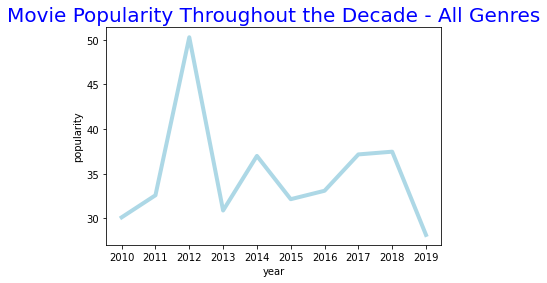

In [22]:
fig, ax = plt.subplots()
ax.plot(tmdb_groupby['year'], tmdb_groupby['popularity'], color='lightblue', linewidth=4, linestyle='-')
ax.set_xlabel('year')
ax.set_ylabel('popularity')
ax.set_title('Movie Popularity Throughout the Decade - All Genres', color='blue', fontsize=20)

In [23]:
#Joel magic here
plot_table = tmdb_exploded.groupby(['genre_codes', 'year']).mean().reset_index().pivot(index='year', columns='genre_codes', values='popularity')
plot_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2010 to 2019
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Action     9 non-null      float64
 1   Adventure  9 non-null      float64
 2   Animation  4 non-null      float64
 3   Comedy     7 non-null      float64
 4   Crime      5 non-null      float64
 5   Drama      7 non-null      float64
 6   Family     7 non-null      float64
 7   Fantasy    8 non-null      float64
 8   History    2 non-null      float64
 9   Horror     2 non-null      float64
 10  Music      2 non-null      float64
 11  Mystery    2 non-null      float64
 12  Romance    4 non-null      float64
 13  Sci-Fi     8 non-null      float64
 14  Thriller   4 non-null      float64
 15  War        2 non-null      float64
dtypes: float64(16)
memory usage: 1.3+ KB


<AxesSubplot:xlabel='year'>

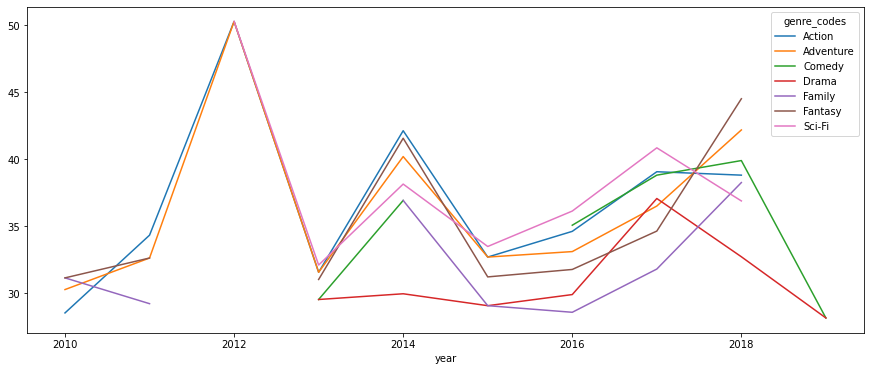

In [24]:
plot_dropped = plot_table.drop(columns=['History', 'Horror', 'Music', 'Mystery', 'War', 'Animation', 'Thriller', 'Romance', 'Crime'])
plot_dropped.plot(figsize = (15,6))

### plot popularity for each genre separately

In [25]:
tmdb_exploded.head(2)

,idx,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_codes,year
23811,23811,12,299536,en,Avengers: Infinity War,80.77,2018-04-27,Avengers: Infinity War,8.30,13948,Adventure,2018
23811,23811,28,299536,en,Avengers: Infinity War,80.77,2018-04-27,Avengers: Infinity War,8.30,13948,Action,2018


<AxesSubplot:xlabel='genre_codes', ylabel='popularity'>

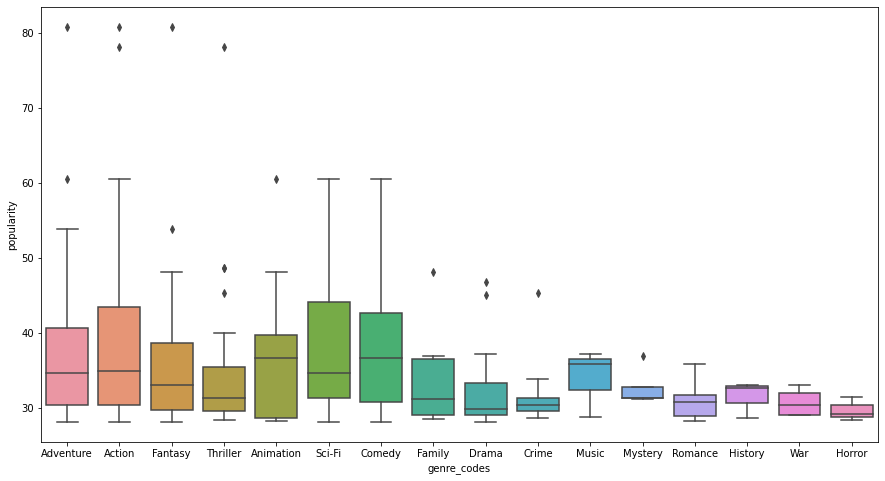

In [26]:
f, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x="genre_codes", y="popularity", data=tmdb_exploded)

Text(0.5, 1.0, 'Movie Popularity Throughout the Year - All Genres')

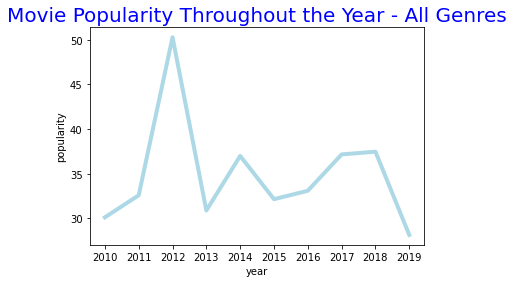

In [27]:
fig, ax = plt.subplots()
ax.plot(tmdb_groupby['year'], tmdb_groupby['popularity'], color='lightblue', linewidth=4, linestyle='-')
ax.set_xlabel('year')
ax.set_ylabel('popularity')
ax.set_title('Movie Popularity Throughout the Year - All Genres', color='blue', fontsize=20)

### MISC section below plot overall distribution of Genres from somewhere???

In [28]:
#df_genres.describe()
# df_genres.plot(kind='hist', bins=50)
# ax.set_title("Distribution of Movie Genres")

========================

#### make a plot of the top movie gross 1995-2021
based on data from here: https://m.the-numbers.com/market/

In [29]:
gross = pd.read_csv('data/tn_top_grossers.csv') 


In [30]:
gross['Total Box Office'] = gross['Total Box Office'].str.replace(',', '')
gross['Total Box Office'] = gross['Total Box Office'].str.replace('$', '')
gross[['Total Box Office']] = gross[['Total Box Office']].apply(pd.to_numeric) 
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              15 non-null     int64 
 1   Genre             15 non-null     object
 2   Movies            15 non-null     object
 3   Total Box Office  15 non-null     int64 
 4   Tickets           15 non-null     object
 5   Share             15 non-null     object
dtypes: int64(2), object(4)
memory usage: 848.0+ bytes


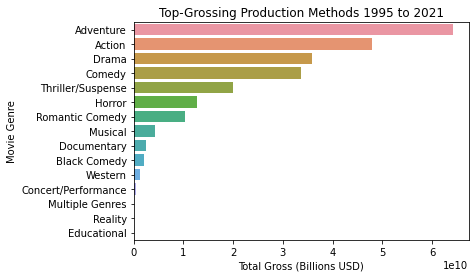

In [31]:
gross_plot = sns.barplot(data=gross, y="Genre", x="Total Box Office")
gross_plot.set(xlabel = "Total Gross (Billions USD)", ylabel='Movie Genre', title='Top-Grossing Production Methods 1995 to 2021')
gross_plot;

### merging tn_movie_budgets and imdb_title_basics

In [32]:
df = pd.read_sql('''SELECT *
                 FROM tmdb_movies AS tmdb_mov

                 ;''', conn)

In [33]:
df.head()

,idx,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186


In [34]:
df = pd.read_sql('''SELECT tn.release_date, movie, production_budget, domestic_gross, worldwide_gross, popularity, title 
                 FROM tn_movie_budgets AS tn
                 JOIN tmdb_movies AS tmdb_mov 
                 ON tn.movie = 
                 tmdb_mov.title
                 ;''', conn)

In [35]:
df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,popularity,title
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",26.53,Avatar
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",30.58,Pirates of the Caribbean: On Stranger Tides
2,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",44.38,Avengers: Age of Ultron
3,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",80.77,Avengers: Infinity War
4,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",34.95,Justice League


In [36]:
df.info()
#note: only 2,385 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       2385 non-null   object 
 1   movie              2385 non-null   object 
 2   production_budget  2385 non-null   object 
 3   domestic_gross     2385 non-null   object 
 4   worldwide_gross    2385 non-null   object 
 5   popularity         2385 non-null   float64
 6   title              2385 non-null   object 
dtypes: float64(1), object(6)
memory usage: 130.6+ KB


In [37]:
df['production_budget'] = df['production_budget'].str.replace(',', '')
df['production_budget'] = df['production_budget'].str.replace('$', '')
df['production_budget'] = df['production_budget'].apply(pd.to_numeric) 
df['domestic_gross'] = df['domestic_gross'].str.replace(',', '')
df['domestic_gross'] = df['domestic_gross'].str.replace('$', '')
df['domestic_gross'] = df['domestic_gross'].apply(pd.to_numeric) 
df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '')
df['worldwide_gross'] = df['worldwide_gross'].str.replace('$', '')
df['worldwide_gross'] = df['worldwide_gross'].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       2385 non-null   object 
 1   movie              2385 non-null   object 
 2   production_budget  2385 non-null   int64  
 3   domestic_gross     2385 non-null   int64  
 4   worldwide_gross    2385 non-null   int64  
 5   popularity         2385 non-null   float64
 6   title              2385 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 130.6+ KB


In [38]:
df_max = df.groupby('movie').max()
df.info()
#1,924 records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       2385 non-null   object 
 1   movie              2385 non-null   object 
 2   production_budget  2385 non-null   int64  
 3   domestic_gross     2385 non-null   int64  
 4   worldwide_gross    2385 non-null   int64  
 5   popularity         2385 non-null   float64
 6   title              2385 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 130.6+ KB


In [39]:
df['total_gross'] = df['domestic_gross'] + df['worldwide_gross']
df['net_profit'] = df['worldwide_gross'] - df['production_budget']

In [40]:
df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,popularity,title,total_gross,net_profit
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,26.53,Avatar,3536852904,2351345279
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,30.58,Pirates of the Caribbean: On Stranger Tides,1286727750,635063875
2,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,44.38,Avengers: Age of Ultron,1862019831,1072413963
3,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,80.77,Avengers: Infinity War,2726949682,1748134200
4,"Nov 17, 2017",Justice League,300000000,229024295,655945209,34.95,Justice League,884969504,355945209


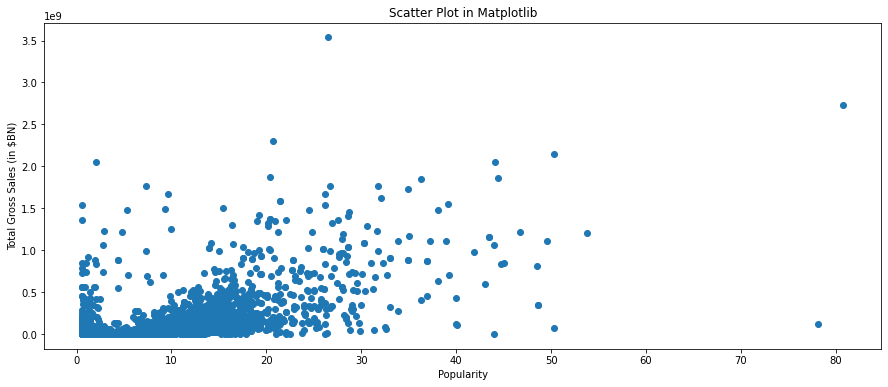

In [41]:
fig, ax = plt.subplots(figsize=(15,6))
ax.scatter(df.popularity, df.total_gross);
ax.set_title("Scatter Plot in Matplotlib")
ax.set_xlabel("Popularity")
ax.set_ylabel("Total Gross Sales (in $BN)");

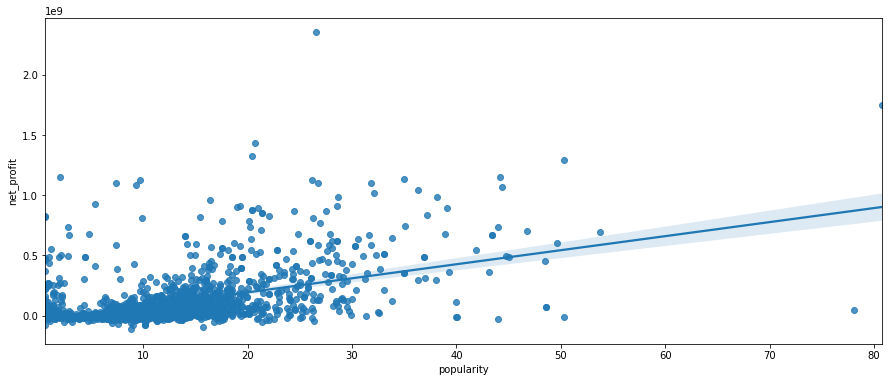

In [42]:
f, ax = plt.subplots(figsize=(15, 6))
sns.regplot(x=df.popularity, y=df.net_profit, data=df);

In [43]:
# model = LinearRegression().fit(df.popularity, df.total_gross)
# r_sq = model.score(df.popularity, df.total_gross)
# print('coefficient of determination:', r_sq)

### what is the net profit of movies over the last 10 years?

In [56]:
tn_budgets = pd.read_sql('''SELECT *
                 FROM tn_movie_budgets
                 ;''', conn)
tn_budgets.info()
#tn_budgets has 5,782 obs in 7 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   idx                5782 non-null   int64 
 1   id                 5782 non-null   int64 
 2   release_date       5782 non-null   object
 3   movie              5782 non-null   object
 4   production_budget  5782 non-null   object
 5   domestic_gross     5782 non-null   object
 6   worldwide_gross    5782 non-null   object
dtypes: int64(2), object(5)
memory usage: 316.3+ KB


In [57]:
#work with the tn_budgets data table
tn_budgets.head()

,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [46]:
# df['production_budget'] = df['production_budget'].str.replace(',', '', regex = True)
# df['production_budget'] = df['production_budget'].str.replace('$', '', regex = True).astype(int)
# df['domestic_gross'] = df['domestic_gross'].str.replace(',', '', regex = True)
# df['domestic_gross'] = df['domestic_gross'].str.replace('$', '', regex = True).astype(int)
# df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '', regex = True)
# df['worldwide_gross'] = df['worldwide_gross'].str.replace('$', '', regex = True).astype(int)
# df.release_date = pd.to_datetime(df.release_date)
# df['logged_budget'] = np.log(df['production_budget'])
# df['total_gross'] = df['worldwide_gross'] + df['domestic_gross']
# df['net_profit'] = df['total_gross'] - df['production_budget']
# df['return_on_investment'] = df['total_gross'] / df['production_budget']
# df = df[(df['release_date'] >= '2010-01-01') & (df['release_date'] <= '2020-01-01')]
# month = df['release_date'].apply(lambda x: x.month)
# year = df['release_date'].apply(lambda x: x.year)
# df['date_month'] = month
# df['date_year'] = year

In [58]:
#turn date to datetime
tn_budgets.release_date = pd.to_datetime(tn_budgets.release_date)
tn_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idx                5782 non-null   int64         
 1   id                 5782 non-null   int64         
 2   release_date       5782 non-null   datetime64[ns]
 3   movie              5782 non-null   object        
 4   production_budget  5782 non-null   object        
 5   domestic_gross     5782 non-null   object        
 6   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 316.3+ KB


In [59]:
# #sort for decade from 2010-2020 for tn_budgets
tn_budgets = tn_budgets[(tn_budgets['release_date'] >= '1990-01-01') & (tn_budgets['release_date'] <= '2020-01-01')]
tn_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5207 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idx                5207 non-null   int64         
 1   id                 5207 non-null   int64         
 2   release_date       5207 non-null   datetime64[ns]
 3   movie              5207 non-null   object        
 4   production_budget  5207 non-null   object        
 5   domestic_gross     5207 non-null   object        
 6   worldwide_gross    5207 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 325.4+ KB


In [60]:
year = tn_budgets['release_date'].apply(lambda x: x.year)
tn_budgets['date_year'] = year
tn_budgets.head()

,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,date_year
0,0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017


In [61]:
#make gross
tn_budgets['production_budget'] = tn_budgets['production_budget'].str.replace(',', '', regex = True)
tn_budgets['production_budget'] = tn_budgets['production_budget'].str.replace('$', '', regex = True).astype(int)
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].str.replace(',', '', regex = True)
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].str.replace('$', '', regex = True).astype(int)
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].str.replace(',', '', regex = True)
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].str.replace('$', '', regex = True).astype(float)

#create total gross & net profit
tn_budgets['total_gross'] = tn_budgets['worldwide_gross'] + tn_budgets['domestic_gross']
tn_budgets['net_profit'] = tn_budgets['total_gross'] - tn_budgets['production_budget']
tn_budgets.head()

,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,date_year,total_gross,net_profit
0,0,1,2009-12-18,Avatar,425000000,760507625,2776345279.00,2009,3536852904.00,3111852904.00
1,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875.00,2011,1286727750.00,876127750.00
2,2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350.00,2019,192524700.00,-157475300.00
3,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963.00,2015,1862019831.00,1531419831.00
4,4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747.00,2017,1936903129.00,1619903129.00


In [62]:
tn_budgets.describe()

,idx,id,production_budget,domestic_gross,worldwide_gross,date_year,total_gross,net_profit
count,5207.00,5207.00,5207.00,5207.00,5207.00,5207.00,5207.00,5207.00
mean,2781.75,50.31,33863832.00,42373872.17,95580787.84,2007.22,137954660.01,104090828.01
std,1678.48,28.63,43245873.02,69717045.23,180944558.43,6.90,247758710.34,216991461.17
min,0.00,1.00,1100.00,0.00,0.00,1990.00,0.00,-157475300.00
25%,1314.50,26.00,5600000.00,1044091.00,3562531.00,2002.00,5530069.00,-500000.00
50%,2703.00,50.00,20000000.00,17017811.00,29652736.00,2008.00,47299762.00,24002654.00
75%,4209.50,75.00,45000000.00,53323800.50,102580758.50,2013.00,156898761.50,113961380.50
max,5781.00,100.00,425000000.00,936662225.00,2776345279.00,2019.00,3536852904.00,3111852904.00


In [63]:
tn_summary=tn_budgets.groupby('date_year').mean('total_gross')
tn_summary

,idx,id,production_budget,domestic_gross,worldwide_gross,total_gross,net_profit
date_year,,,,,,,
1990,2614.93,45.93,26244333.33,73558836.77,134574321.47,208133158.23,181888824.90
1991,2978.03,53.38,22051487.18,54798637.18,92595569.72,147394206.90,125342719.72
1992,2622.69,51.47,25363888.89,61230568.19,111861726.56,173092294.75,147728405.86
1993,3011.41,53.22,20379734.69,45878579.53,89519614.47,135398194.00,115018459.31
1994,2442.71,54.43,29786196.43,57624250.54,116904611.30,174528861.84,144742665.41
1995,2307.73,48.73,34634000.00,44391895.27,96145072.12,140536967.39,105902967.39
1996,2479.10,53.17,31575707.79,39526394.06,79064594.93,118590988.99,87015281.20
1997,2212.38,49.66,40691049.02,51393135.53,110634700.02,162027835.55,121336786.53
1998,2741.60,49.88,30016993.38,36484820.89,68555746.67,105040567.56,75023574.19


In [64]:
tn_summary.reset_index(inplace=True)
tn_summary

,date_year,idx,id,production_budget,domestic_gross,worldwide_gross,total_gross,net_profit
0,1990,2614.93,45.93,26244333.33,73558836.77,134574321.47,208133158.23,181888824.90
1,1991,2978.03,53.38,22051487.18,54798637.18,92595569.72,147394206.90,125342719.72
2,1992,2622.69,51.47,25363888.89,61230568.19,111861726.56,173092294.75,147728405.86
3,1993,3011.41,53.22,20379734.69,45878579.53,89519614.47,135398194.00,115018459.31
4,1994,2442.71,54.43,29786196.43,57624250.54,116904611.30,174528861.84,144742665.41
5,1995,2307.73,48.73,34634000.00,44391895.27,96145072.12,140536967.39,105902967.39
6,1996,2479.10,53.17,31575707.79,39526394.06,79064594.93,118590988.99,87015281.20
7,1997,2212.38,49.66,40691049.02,51393135.53,110634700.02,162027835.55,121336786.53
8,1998,2741.60,49.88,30016993.38,36484820.89,68555746.67,105040567.56,75023574.19
9,1999,2689.20,53.19,30010033.15,38193695.31,70545621.34,108739316.65,78729283.50


Text(0.5, 1.0, 'Movie Profits')

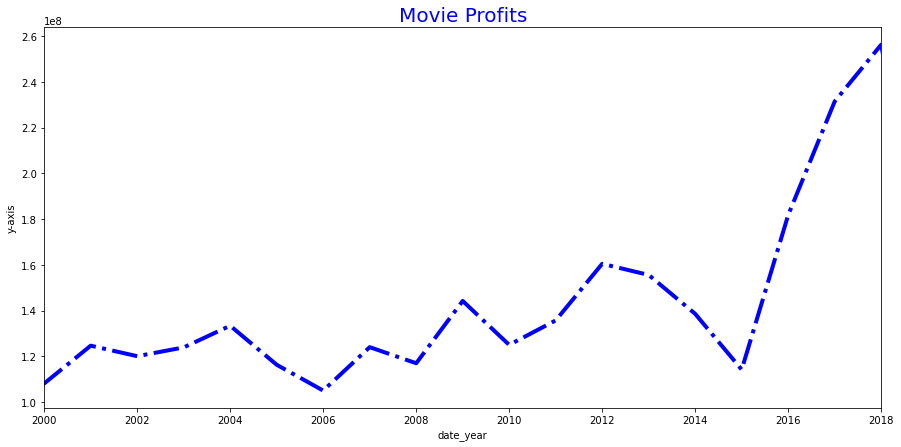

In [68]:
fig, ax = plt.subplots(figsize = (15,7))
ax.plot(tn_summary['date_year'], tn_summary['total_gross'], color='blue', linewidth=4, linestyle='-.')
ax.set_xlabel('date_year')
ax.set_xlim(2000, 2018)
ax.set_ylabel('y-axis')
ax.set_title('Movie Profits', color='blue', fontsize=20)